In [1]:
# https://plotly.com/python/histograms/
# https://community.plotly.com/t/use-of-dropdown-menu-for-histogram/87081
# https://plotly.com/blog/dash-matplotlib/

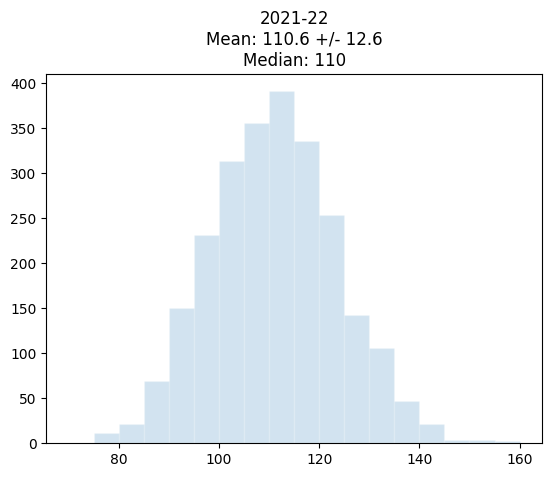

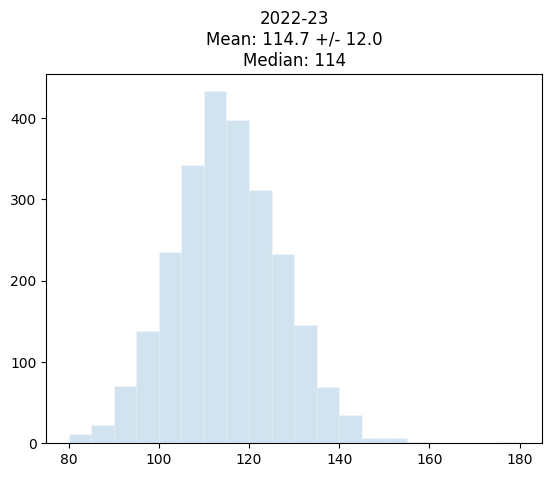

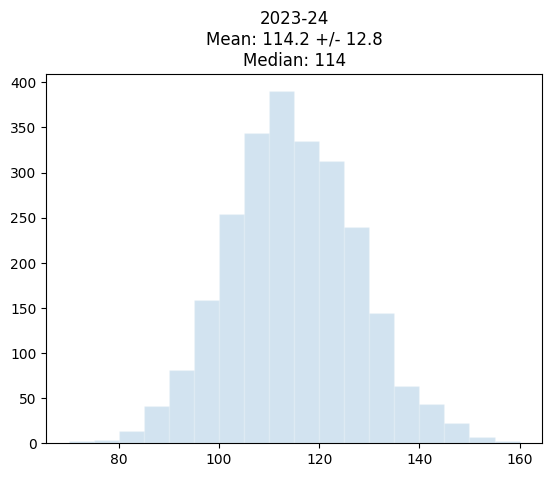

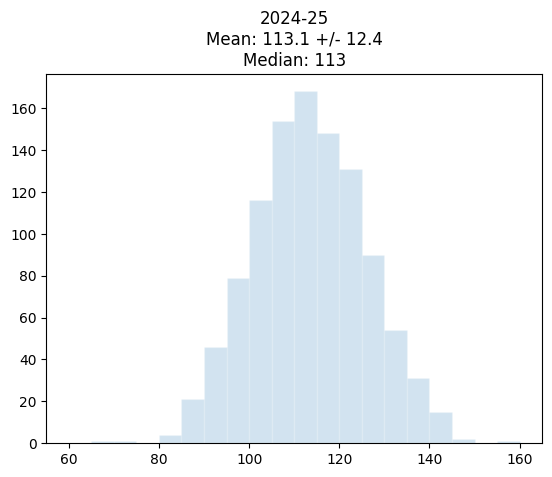

In [28]:
# Calculate REGULAR SEASON stat to the event level, aggregate differences at league level
import mathletics_utilities as mu
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as m

con,engine = mu.cnxn_info()
seasons = mu.seasons()

for season in seasons:
    season_conv = mu.season_conversion(season)
    # Query data
    sch = pd.read_sql_query(f"""select game_id,home_pts,away_pts,game_type,game_time
                            from schedule${season_conv} where home_pts is not null""",con=engine)
    sch = sch[ sch["game_type"]=="Regular Season" ]
    sch.sort_values("game_time",inplace=True)    # Sort by date, preserve time order
    #sch.set_index("game_id",inplace=True)

    ps = pd.read_sql_query(f"select game_id,team_id,period,pts from player_stats${season_conv}",con=engine)
    
    stat_list = []

    for game in sch.index:
        # Event-dependent assignments
        home_stat = sch.loc[game,"home_pts"]               # Assign home
        away_stat = sch.loc[game,"away_pts"]               # Assign away
        #game_df = ps[ ps.game_id==game ]     # Event-level df
        # Partition game data by home/away
        #home_df = game_df[game_df.team_id==home_id]         # Home partition of event-level df
        #away_df = game_df[game_df.team_id==away_id]         # Away partition
        # Calculate possessions
        #home_stat = home_df.pts.sum()
        #away_stat = away_df.pts.sum()
        
        stat_list.append(home_stat)     # For 
        stat_list.append(away_stat)

        max_stat = max(stat_list)
        min_stat = min(stat_list)
        
        limit_low = m.floor(min_stat/10) * 10
        limit_high = m.ceil(max_stat/10) * 10
        bins = int((limit_high - limit_low) / 5)

    plt.hist(stat_list,
             range=[limit_low,limit_high],
             bins=bins,
             edgecolor="white",
             linewidth=1,
             alpha=.2)

    plt.title(f"{season}\nMean: {round(np.mean(stat_list),1)} +/- {round(np.std(stat_list),1)}\nMedian: {int(np.median(stat_list))}")
    plt.show()
    
    """ Save block
    plt.savefig(path_support+f"Images\\{team}.png",bbox_inches="tight")
    plt.close()     # To avoid warning about potential memory
    return print(f"{team} image saved")"""
    
    
    print()

In [15]:
num_list = [np.random.randint(73,136) for i in range(1000)]     # Pts
pts_index = sorted(set(num_list))
pts_min,pts_max = min(num_list),max(num_list)

limit_low = m.floor(pts_min/10) * 10
limit_high = m.ceil(139/10) * 10
bins = int((limit_high - limit_low) / 5)

print(pts_min,pts_max)
print(limit_low,limit_high)
print(bins)

73 135
70 140
14


In [ ]:
import plotly.graph_objects as go

import pandas as pd

# Load dataset
df = pd.read_csv(
    "https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv")
df.columns = [col.replace("AAPL.", "") for col in df.columns]

# Initialize figure
fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Scatter(x=list(df.Date),
               y=list(df.High),
               name="High",
               line=dict(color="#33CFA5")))

fig.add_trace(
    go.Scatter(x=list(df.Date),
               y=[df.High.mean()] * len(df.index),
               name="High Average",
               visible=False,
               line=dict(color="#33CFA5", dash="dash")))

fig.add_trace(
    go.Scatter(x=list(df.Date),
               y=list(df.Low),
               name="Low",
               line=dict(color="#F06A6A")))

fig.add_trace(
    go.Scatter(x=list(df.Date),
               y=[df.Low.mean()] * len(df.index),
               name="Low Average",
               visible=False,
               line=dict(color="#F06A6A", dash="dash")))

# Add Annotations and Buttons
high_annotations = [dict(x="2016-03-01",
                         y=df.High.mean(),
                         xref="x", yref="y",
                         text="High Average:<br> %.3f" % df.High.mean(),
                         ax=0, ay=-40),
                    dict(x=df.Date[df.High.idxmax()],
                         y=df.High.max(),
                         xref="x", yref="y",
                         text="High Max:<br> %.3f" % df.High.max(),
                         ax=-40, ay=-40)]
low_annotations = [dict(x="2015-05-01",
                        y=df.Low.mean(),
                        xref="x", yref="y",
                        text="Low Average:<br> %.3f" % df.Low.mean(),
                        ax=0, ay=40),
                   dict(x=df.Date[df.High.idxmin()],
                        y=df.Low.min(),
                        xref="x", yref="y",
                        text="Low Min:<br> %.3f" % df.Low.min(),
                        ax=0, ay=40)]

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="None",
                     method="update",
                     args=[{"visible": [True, False, True, False]},
                           {"title": "Yahoo",
                            "annotations": []}]),
                dict(label="High",
                     method="update",
                     args=[{"visible": [True, True, False, False]},
                           {"title": "Yahoo High",
                            "annotations": high_annotations}]),
                dict(label="Low",
                     method="update",
                     args=[{"visible": [False, False, True, True]},
                           {"title": "Yahoo Low",
                            "annotations": low_annotations}]),
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True, True, True]},
                           {"title": "Yahoo",
                            "annotations": high_annotations + low_annotations}]),
            ]),
        )
    ])

# Set title
fig.update_layout(title_text="Yahoo")

fig.show()